In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import sklearn
from sklearn import datasets
import pandas as pd
from ydata_profiling import ProfileReport  # установка: conda install -c conda-forge ydata-profiling 

In [3]:
# data = datasets.fetch_openml(name='blood-transfusion-service-center', version=1, parser='auto', data_home='datasets', 
#                           as_frame=True)  

In [4]:
data = datasets.fetch_openml(data_id=1464, parser='auto', data_home='datasets', 
                          as_frame=True)  

In [5]:
data.DESCR

'**Author**: Prof. I-Cheng Yeh  \n**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center)  \n**Please cite**: Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence", Expert Systems with Applications, 2008.   \n\n**Blood Transfusion Service Center Data Set**  \nData taken from the Blood Transfusion Service Center in Hsin-Chu City in Taiwan -- this is a classification problem.\n\nTo demonstrate the RFMTC marketing model (a modified version of RFM), this study adopted the donor database of Blood Transfusion Service Center in Hsin-Chu City in Taiwan. The center passes their blood transfusion service bus to one university in Hsin-Chu City to gather blood donated about every three months. To build an FRMTC model, we selected 748 donors at random from the donor database. \n\n### Attribute Information  \n* V1: Recency - months since last donation\n* V2: Frequency - total number of donation\n* V3: Moneta

Attribute Information
* V1: Recency - months since last donation
* V2: Frequency - total number of donation
* V3: Monetary - total blood donated in c.c.
* V4: Time - months since first donation


The target attribute is a binary variable representing whether he/she donated blood in March 2007 (2 stands for donating blood; 1 stands for not donating blood).

In [6]:
X=data.data
Y=data.target
Y=Y.apply(int)   # преобразуем '1' и '2' -> 1 и 2

In [7]:
X = X.loc[:,X.columns].astype(float)

In [8]:
X

,V1,V2,V3,V4
0,2.0,50.0,12500.0,98.0
1,0.0,13.0,3250.0,28.0
2,1.0,16.0,4000.0,35.0
3,2.0,20.0,5000.0,45.0
4,1.0,24.0,6000.0,77.0
...,...,...,...,...
743,23.0,2.0,500.0,38.0
744,21.0,2.0,500.0,52.0
745,23.0,3.0,750.0,62.0
746,39.0,1.0,250.0,39.0


In [9]:
Y

0      2
1      2
2      2
3      2
4      1
      ..
743    1
744    1
745    1
746    1
747    1
Name: Class, Length: 748, dtype: category
Categories (2, int64): [1, 2]

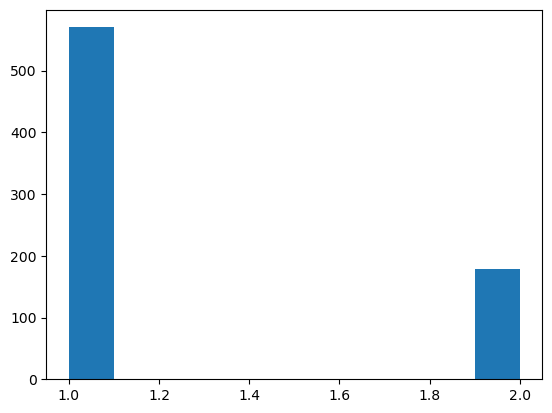

In [10]:
Y.hist(grid=False);

Объединим данные X,Y

In [11]:
Z=X.copy()
Z['Y']=Y

In [12]:
from sklearn.model_selection import train_test_split

# разделим в на обучение/тест в пропорции 80/20%.
Z_train, Z_test = train_test_split(Z, test_size=0.5, random_state=0, stratify=Z['Y'])   
len(Z), len(Z_train), len(Z_test)

(748, 374, 374)

In [13]:
def XY_split(Z):
    '''Функция разбиения по признаки и отклики'''
    Y = Z['Y']
    X = Z.copy()
    X = X.drop('Y',axis=1)
    return X,Y

X_train, Y_train = XY_split(Z_train)
X_test, Y_test = XY_split(Z_test)

In [14]:
X_train.columns, X_test.columns    # проверим, что Y не содержится

(Index(['V1', 'V2', 'V3', 'V4'], dtype='object'),
 Index(['V1', 'V2', 'V3', 'V4'], dtype='object'))

# Анализ данных

In [15]:
# можем анализировать только обучающую выборку
Z=Z_train
X=X_train
Y=Y_train

In [16]:
Y.describe()

count     374
unique      2
top         1
freq      285
Name: Y, dtype: int64

In [17]:
Y

301    1
285    1
370    2
621    1
181    1
      ..
206    1
310    1
429    1
687    1
511    1
Name: Y, Length: 374, dtype: category
Categories (2, int64): [1, 2]

In [18]:
(Y==1).sum(), (Y==2).sum()

(285, 89)

In [19]:
# проверим разброс признаков по std
# а также отсутствие аномально больших и малых значений признаков
X.describe()  

,V1,V2,V3,V4
count,374.000000,374.000000,374.000000,374.000000
mean,9.705882,5.735294,1433.823529,34.930481
std,8.810128,6.568426,1642.106501,24.690263
min,0.000000,1.000000,250.000000,2.000000
25%,2.000000,2.000000,500.000000,16.000000
50%,8.500000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,52.000000
max,74.000000,50.000000,12500.000000,98.000000


In [20]:
Z.dtypes

V1     float64
V2     float64
V3     float64
V4     float64
Y     category
dtype: object

In [21]:
Z

,V1,V2,V3,V4,Y
301,14.0,2.0,500.0,14.0,1
285,11.0,2.0,500.0,14.0,1
370,4.0,2.0,500.0,51.0,2
621,4.0,1.0,250.0,4.0,1
181,10.0,4.0,1000.0,16.0,1
...,...,...,...,...,...
206,2.0,2.0,500.0,16.0,1
310,11.0,5.0,1250.0,38.0,1
429,16.0,3.0,750.0,40.0,1
687,16.0,6.0,1500.0,50.0,1


# Отчет о данных

In [22]:
profile = ProfileReport(Z,config_file='')  # обзор возможностей: https://docs.profiling.ydata.ai/4.5/

In [23]:
profile.to_widgets();  # результаты можно экспортировать в HTML командой profile.to_file("your_report.html")
# если не работает, то просто отобразим переменную profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

# Все попарные зависимости

In [24]:
# цвета: 'r' для класса 1; 'b' для класса 2
cmap = matplotlib.colors.ListedColormap(['r', 'b']) 

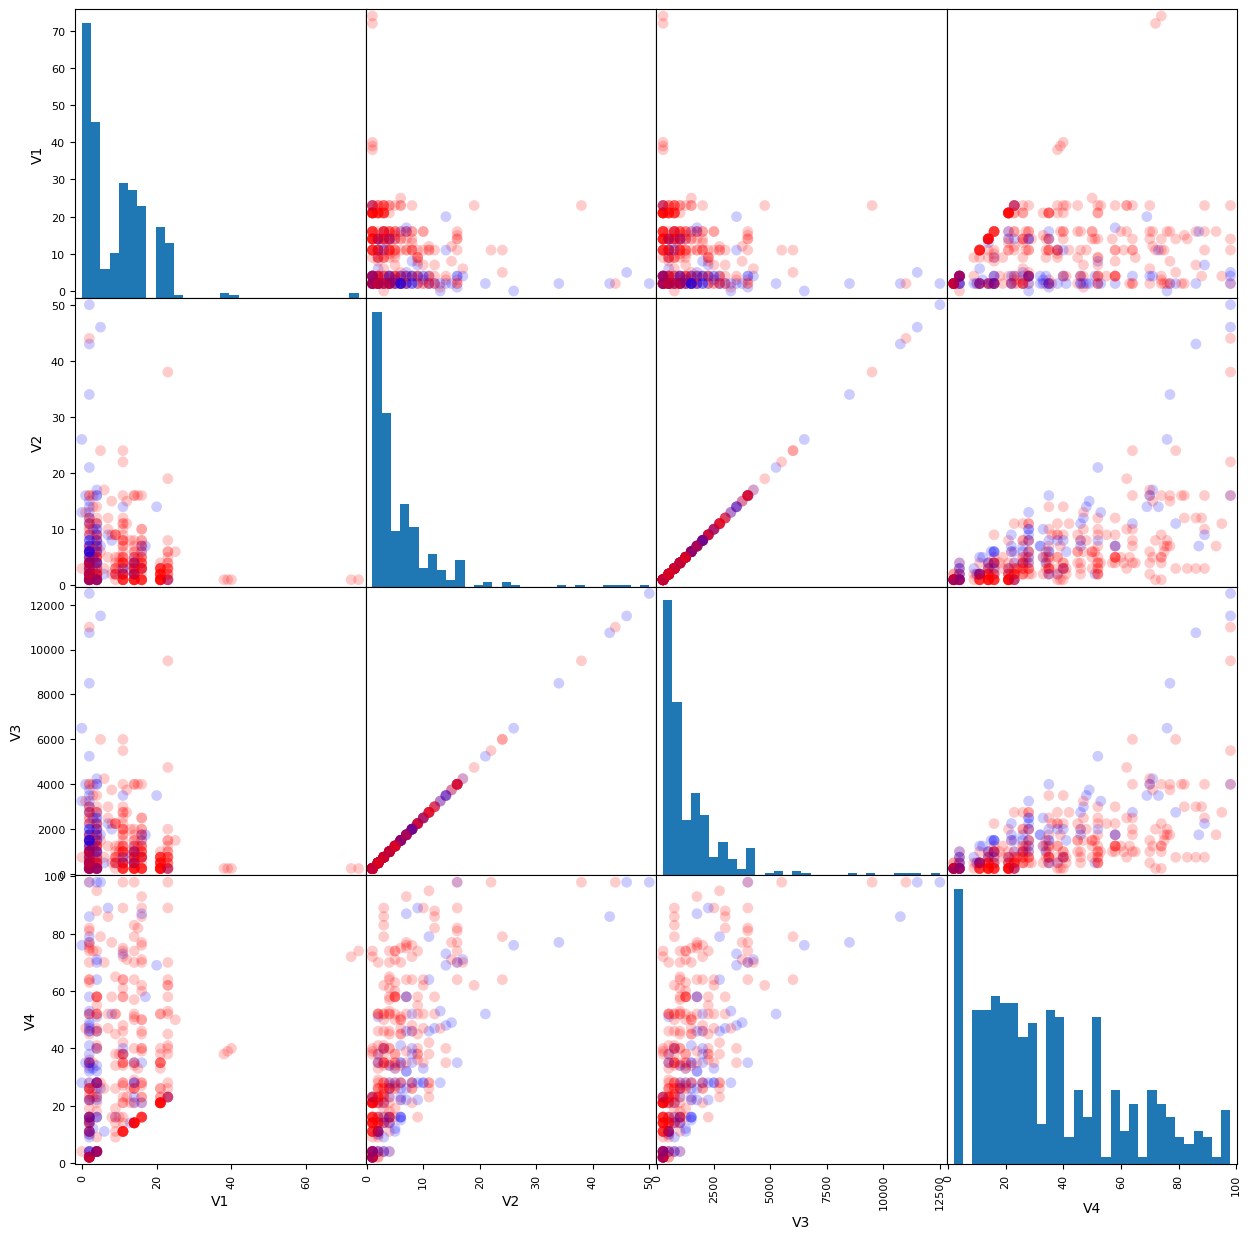

In [25]:
grr = pd.plotting.scatter_matrix(X, c=Y, figsize=(15, 15), marker='o',
hist_kwds={'bins': 30}, s=60, alpha=.2, cmap=cmap)  

Переменные V2 и V3 подозрительно повторяют друг друга.

In [26]:
Z.loc[:,['V2','V3']]

,V2,V3
301,2.0,500.0
285,2.0,500.0
370,2.0,500.0
621,1.0,250.0
181,4.0,1000.0
...,...,...
206,2.0,500.0
310,5.0,1250.0
429,3.0,750.0
687,6.0,1500.0


Они действительно равны с точностью до контстанты.

In [27]:
all(Z['V2']==Z['V3']/250)

True

# Индивидуальная зависимость от двух переменных

## Без обозначений класса

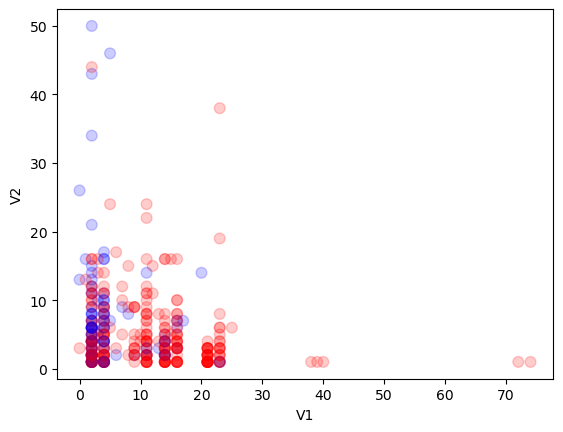

In [28]:
plt.scatter(Z['V1'],Z['V2'], c=Y, cmap=cmap, marker='o', s=60, alpha=.2)
plt.xlabel('V1')
plt.ylabel('V2');

## С обозначениями класса

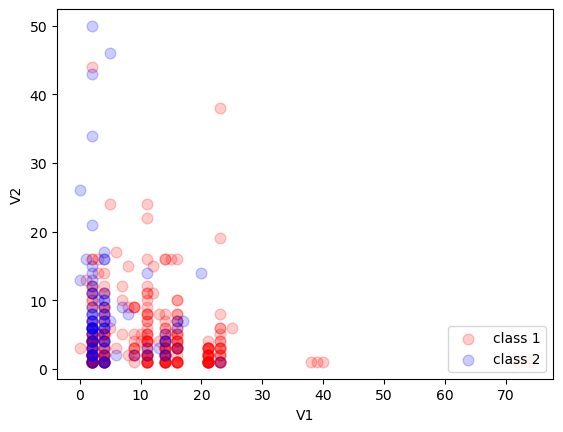

In [29]:
for cls,color in zip([1,2],['r', 'b']):
    plt.scatter(Z.loc[Y==cls,'V1'], Z.loc[Y==cls,'V2'], marker='o', color=color, s=60, alpha=.2, label=f'class {cls}')
plt.xlabel('V1')
plt.ylabel('V2')
gca().legend(loc="lower right");

# Индивидуальная зависимость от одной переменной

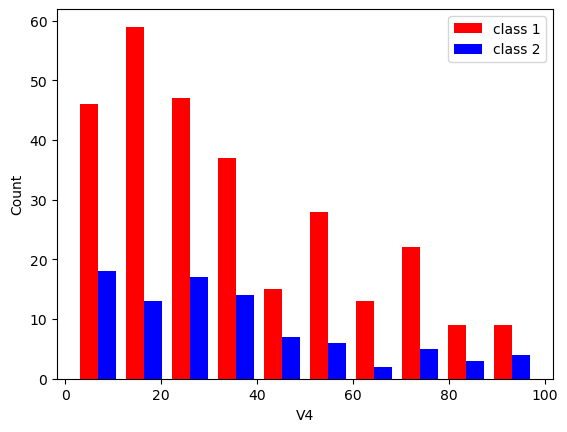

In [30]:
plt.hist([Z.loc[Y==1,'V4'], Z.loc[Y==2,'V4']], color=['r', 'b'], label=['class 1', 'class 2'])
plt.xlabel('V4')
plt.ylabel('Count')
plt.legend()
plt.show()

### Определим функцию для 3D визуализаций:

In [31]:
def plot3d(Z,var1,var2,var3):
    plt.figure(figsize=(10, 10))
    ax = plt.subplot(projection='3d')
    ax.scatter(Z[var1], Z[var2], Z[var3], c=Z['Y'], cmap=cmap)
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)
    ax.set_zlabel(var3)
    plt.show()

Более экономичная визуализация, но без интерактивности:

In [32]:
%matplotlib inline   

Более ресурсоёмкая визуализация, зато интерактивная

In [33]:
%matplotlib widget   

Интерактивная визуализация в отдельном окне:

In [34]:
#%matplotlib tk

Попробуем визуализации в разных осях:

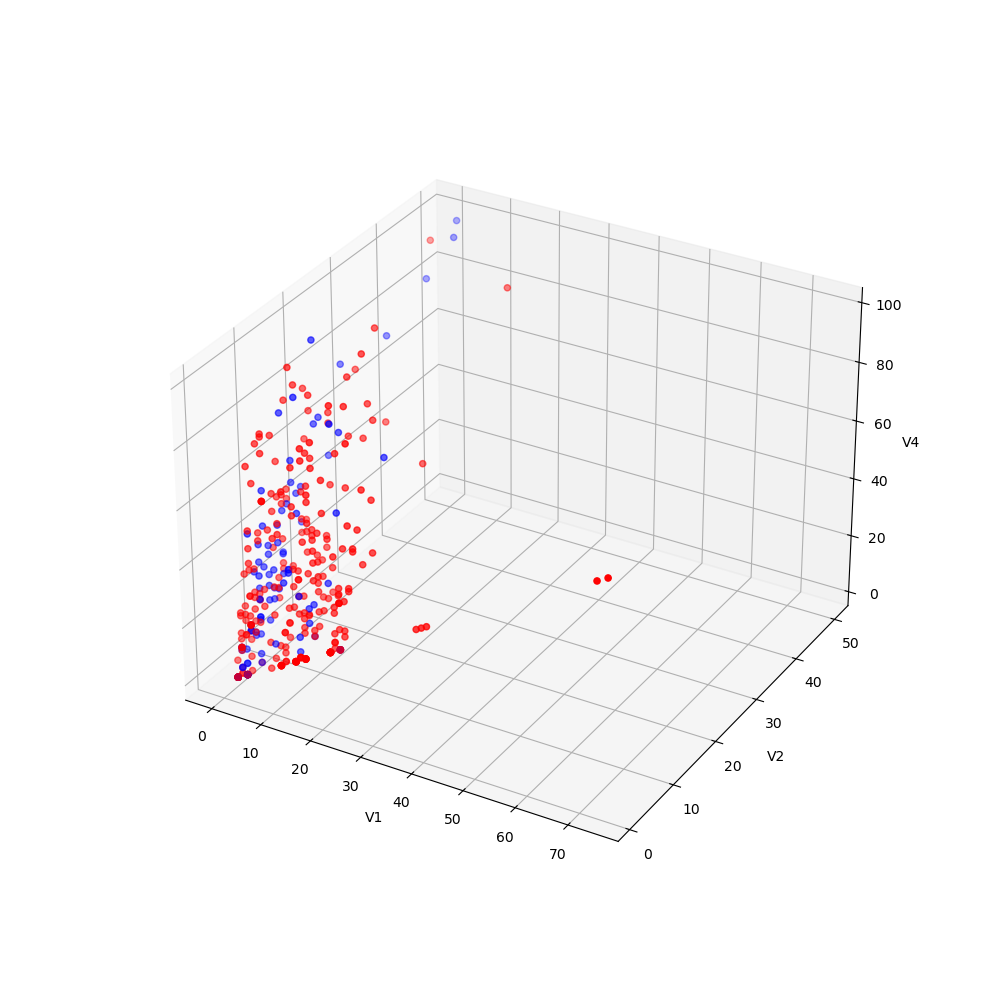

In [35]:
#plot3d(Z,'V1','V2','V3')  # V2=V3, поэтому неинформативно
plot3d(Z,'V1','V2','V4')   # классы хорошо разделяются

# Метрические методы прогнозирования

In [36]:
from sklearn import neighbors
from sklearn import metrics

## Метод ближайших центроидов

In [37]:
model = sklearn.neighbors.NearestCentroid()
model.fit(X_train,Y_train);
Y_hat = model.predict(X_test)

In [38]:
def show_accuracy(Y_test, Y_hat):
    acc = sklearn.metrics.accuracy_score(Y_test, Y_hat)
    print(f'Accuracy: {acc:.2f}')
    
    cm = sklearn.metrics.confusion_matrix(Y_test, Y_hat)   # матрица счётчиков true_class x predicted_class
    disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot();

Accuracy: 0.66


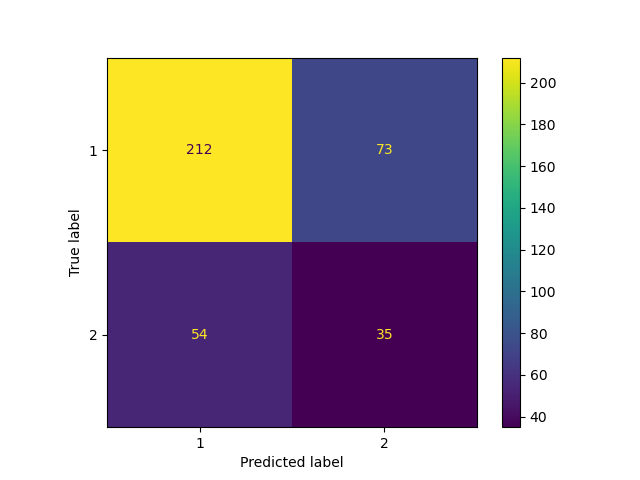

In [39]:
model = sklearn.neighbors.NearestCentroid()
model.fit(X_train,Y_train)
Y_hat = model.predict(X_test)

show_accuracy(Y_test, Y_hat)

## Метод ближайших соседей

### Попробуем K=1

Accuracy: 0.73


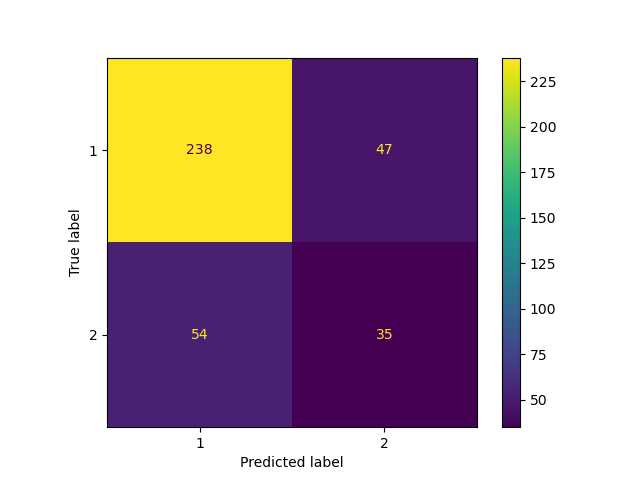

In [40]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,Y_train)
Y_hat = model.predict(X_test)

show_accuracy(Y_test, Y_hat)

### Попробуем K=19

Accuracy: 0.75


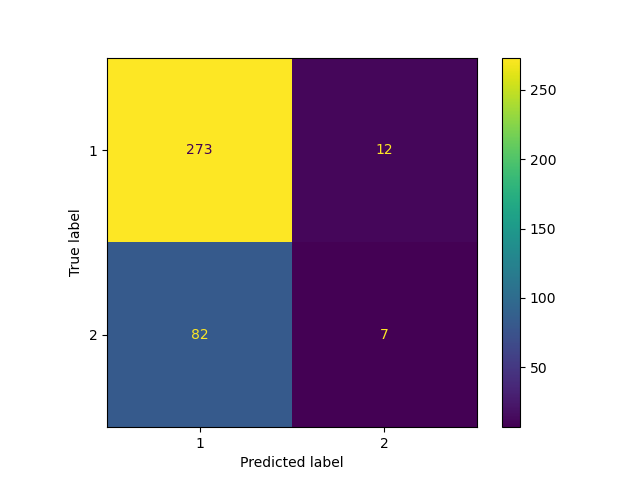

In [41]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=19)
model.fit(X_train,Y_train)
Y_hat = model.predict(X_test)

show_accuracy(Y_test, Y_hat)

### Попробуем K=27

Accuracy: 0.76


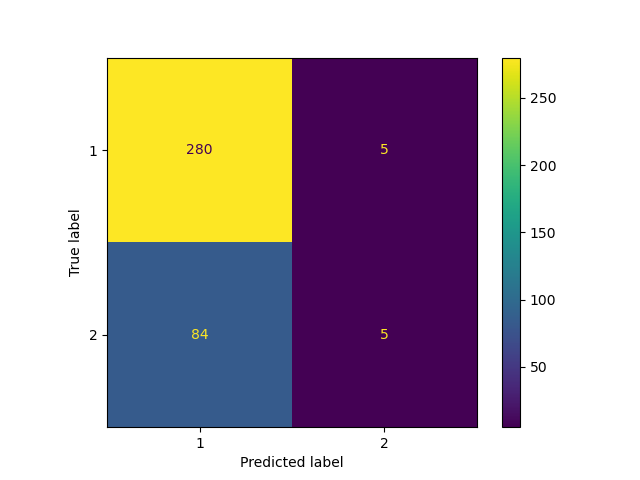

In [42]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=27)
model.fit(X_train,Y_train)
Y_hat = model.predict(X_test)

show_accuracy(Y_test, Y_hat)

## Построим зависимость от K

In [43]:
def find_best_K(model, X_train, Y_train, X_test, Y_test):
    K_values = range(1,100,2)
    acc_values = []

    for K in K_values:
        model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=K)
        model.fit(X_train,Y_train)
        Y_hat = model.predict(X_test)
        acc = sklearn.metrics.accuracy_score(Y_test, Y_hat)
        acc_values.append(acc)
    
    figure()
    plot(K_values, acc_values)
    xlabel('# ближайших соседей');
    ylabel('точность');

    acc_values = np.array(acc_values)
    print(f'Максимальная точность равна {max(acc_values):.2f}.')
    
    inds = np.where(acc_values==max(acc_values))[0]   # найдём индексы в массиве, дающие максимальную точность
    
    print(f'Максимальная точность достигается при K={K_values[inds[0]]}.')

Максимальная точность равна 0.76.
Максимальная точность достигается при K=23.


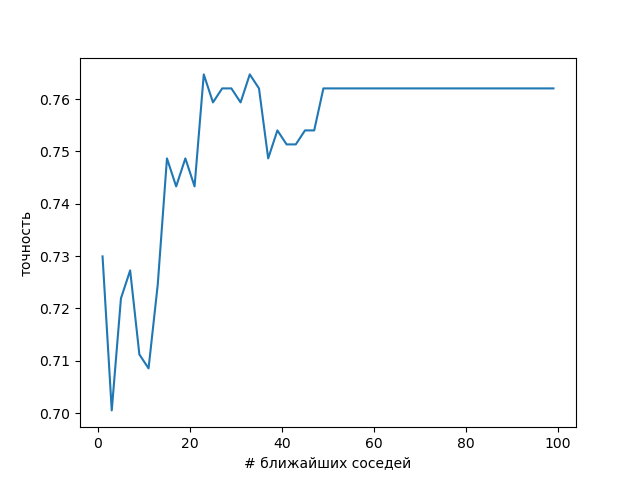

In [44]:
find_best_K(model, X_train,Y_train, X_test, Y_test)

## Лучшая модель

Accuracy: 0.76


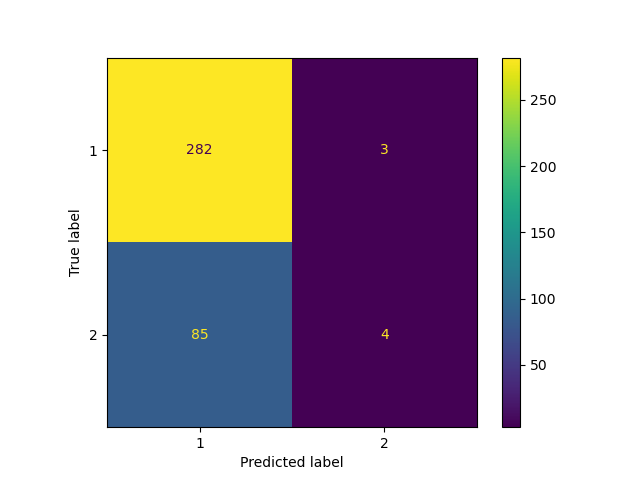

In [45]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=23)
model.fit(X_train,Y_train)
Y_hat = model.predict(X_test)

show_accuracy(Y_test, Y_hat)

Обратим внимание, что почти все ошибки из-за ошибочной классификации 2го класса, 
при этом верных классификаций этого класса очень мало. 

По сути, метод работает почти как константный прогноз =1. Убедимся в этом:

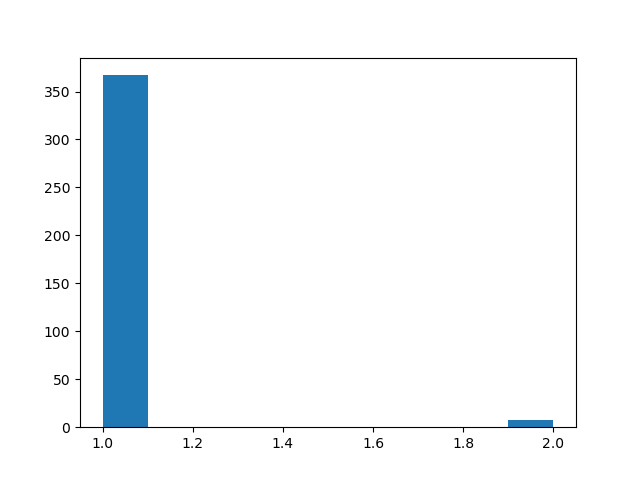

In [46]:
figure()
pd.Series(Y_hat).hist(grid=False);

Вспомним, что у нас V2 и V3 повторяют друг друга с точностью до константы.

In [47]:
X_train.describe()

,V1,V2,V3,V4
count,374.000000,374.000000,374.000000,374.000000
mean,9.705882,5.735294,1433.823529,34.930481
std,8.810128,6.568426,1642.106501,24.690263
min,0.000000,1.000000,250.000000,2.000000
25%,2.000000,2.000000,500.000000,16.000000
50%,8.500000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,52.000000
max,74.000000,50.000000,12500.000000,98.000000


Видим, что разброс у V3 гораздо больше, чем у V2. По сути, в сравнениях участвовала только она. Исключим её.

In [48]:
X_train2 = X_train.drop('V3',axis=1)
X_test2 = X_test.drop('V3',axis=1)

Accuracy: 0.78


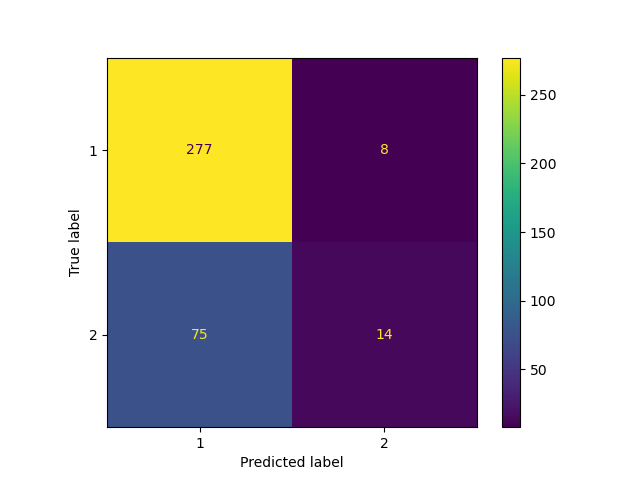

In [49]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=23)
model.fit(X_train2,Y_train)
Y_hat = model.predict(X_test2)

show_accuracy(Y_test, Y_hat)

Точность выросла, поскольку V3 своим разбросом значений забивала действие других признаков.

Метод уже больше пытается предсказывать 2й класс.

## Попробуем привести все признаки к одной шкале.

In [67]:
m = X_train2.mean()
s = X_train2.std()
m,s

V1     9.705882
V2     5.735294
V4    34.930481
dtype: float64

In [51]:
X_train3 = (X_train2-m)/s
X_test3 = (X_test2-m)/s

In [52]:
X_train3.mean()

V1    8.549311e-17
V2    1.424885e-17
V4    2.612289e-17
dtype: float64

In [53]:
X_test3.mean()

V1   -0.045220
V2   -0.067166
V4   -0.052522
dtype: float64

In [54]:
X_train3.std()

V1    1.0
V2    1.0
V4    1.0
dtype: float64

In [55]:
X_test3.std()

V1    0.830600
V2    0.761897
V4    0.975067
dtype: float64

Accuracy: 0.79


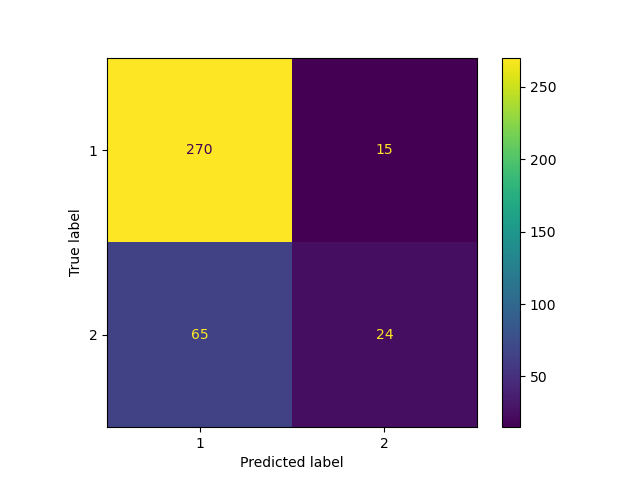

In [56]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=23)
model.fit(X_train3,Y_train)
Y_hat = model.predict(X_test3)

show_accuracy(Y_test, Y_hat)

## Такого же результата можно добиться через pipeline

Accuracy: 0.79


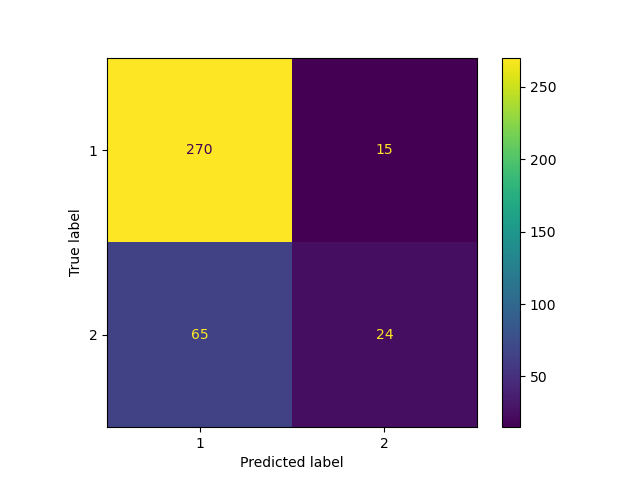

In [57]:
from sklearn import pipeline
from sklearn.preprocessing import StandardScaler

model = sklearn.pipeline.Pipeline([
        ('scale', StandardScaler()),
        ('clf', sklearn.neighbors.KNeighborsClassifier(n_neighbors=23))
        ])

model.fit(X_train2,Y_train)
Y_hat = model.predict(X_test2)

show_accuracy(Y_test, Y_hat)

Accuracy: 0.79


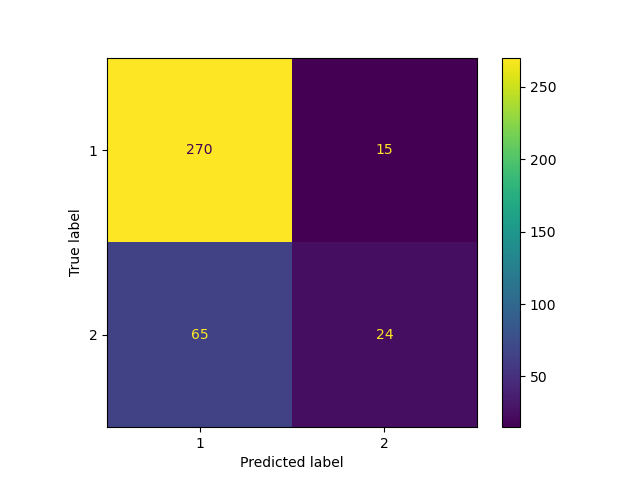

In [58]:
# то же самое на нормализованных вручную данных:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=23)
model.fit(X_train3,Y_train)
Y_hat = model.predict(X_test3)

show_accuracy(Y_test, Y_hat)

Максимальная точность равна 0.79.
Максимальная точность достигается при K=5.


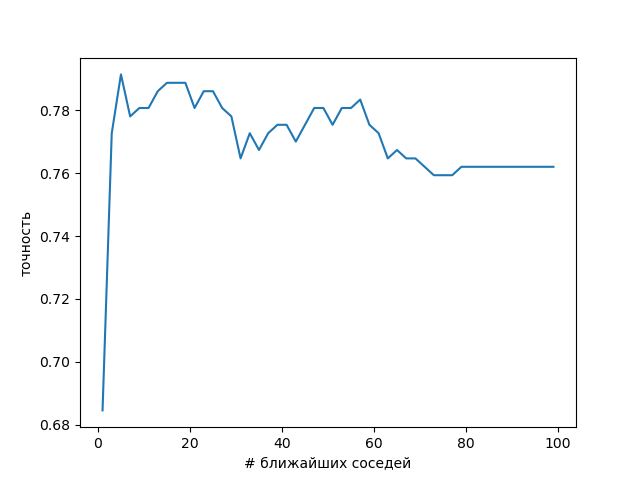

In [59]:
find_best_K(model, X_train3, Y_train, X_test3, Y_test)

Accuracy: 0.79


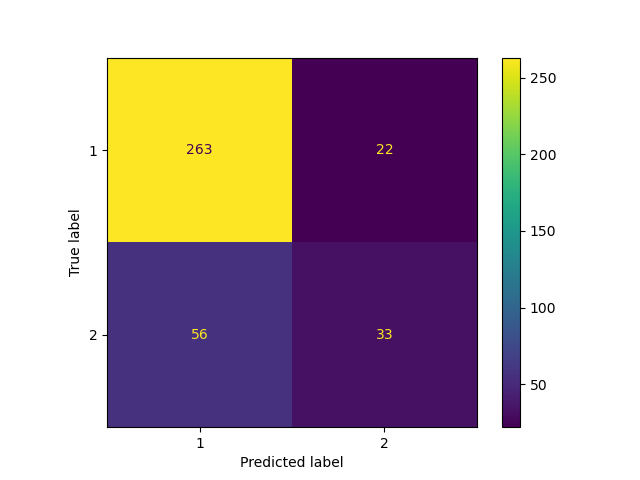

In [60]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
model.fit(X_train3,Y_train)
Y_hat = model.predict(X_test3)

show_accuracy(Y_test, Y_hat)

### Посмотрим еще раз на обновленные данные.

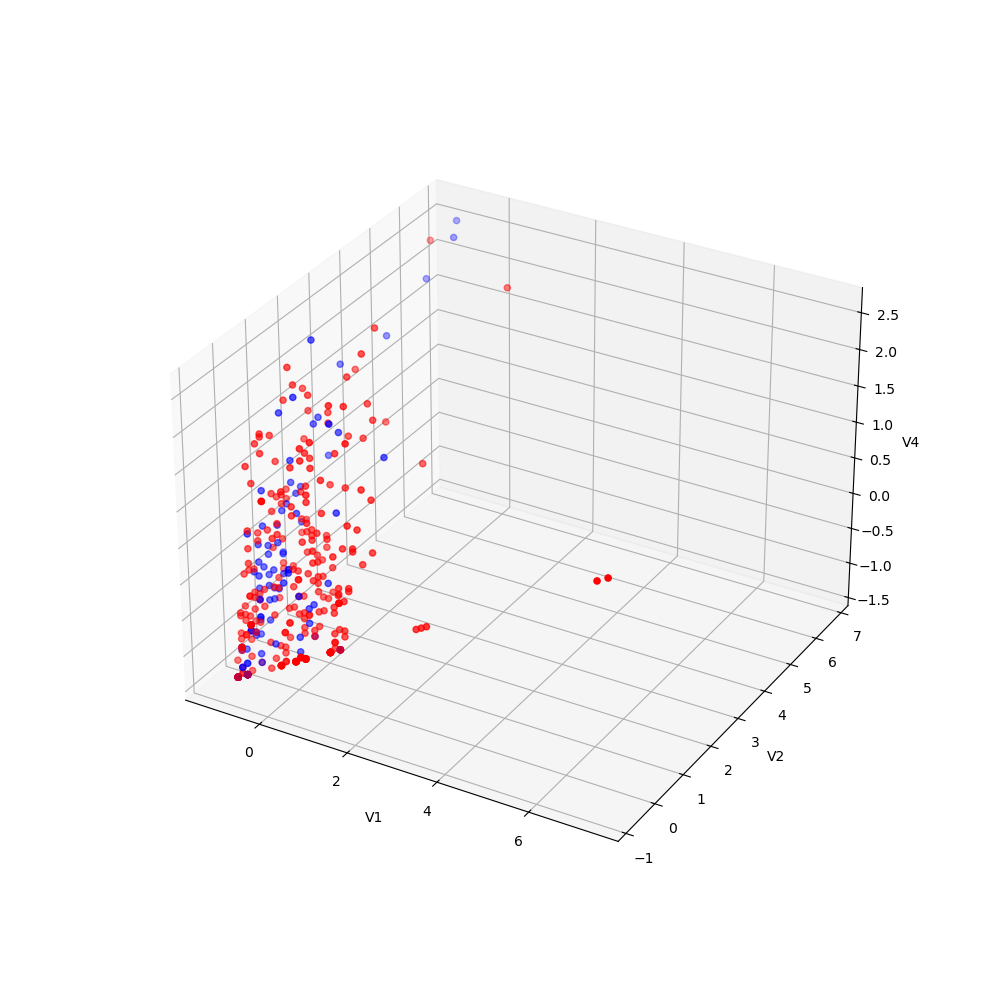

In [61]:
Z3=pd.DataFrame(X_train3,columns=['V1','V2','V4'])
Z3['Y']=Y_train
plot3d(Z3,'V1','V2','V4')

### Попробуем сгенерировать новый признак с небольшим весом.

Accuracy: 0.80


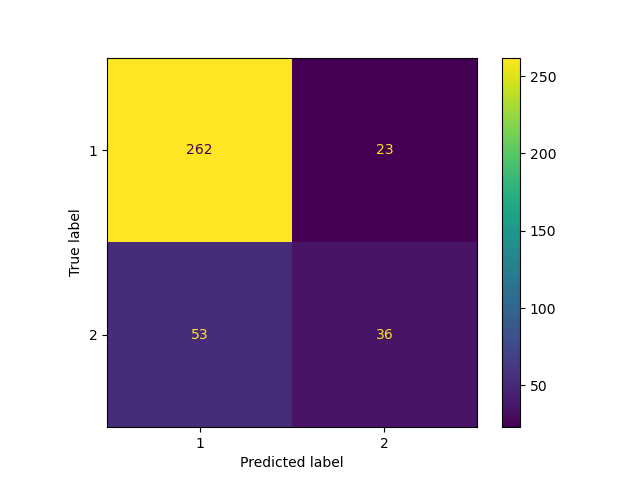

In [62]:
X_train4 = X_train3.copy()
X_test4 = X_test3.copy()

X_train4['extra'] = X_train3['V1']+X_train3['V2']
X_test4['extra'] = X_test3['V1']+X_test3['V2']

m1 = X_train4['extra'].mean()
s1 = X_train4['extra'].std()

X_train4['extra'] = 0.1*(X_train4['extra']-m1)/s1
X_test4['extra'] = 0.1*(X_test4['extra']-m1)/s1

model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
model.fit(X_train4,Y_train)
Y_hat = model.predict(X_test4)

show_accuracy(Y_test, Y_hat)

### Попробуем взвешенный учёт соседей.

In [63]:
def find_best_K_weighted(model, X_train, Y_train, X_test, Y_test):
    K_values = range(1,100,2)
    acc_values = []

    for K in K_values:
        # можно задавать и свою собственную функцию расстояния
        model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=K, weights='distance')  
        model.fit(X_train,Y_train)
        Y_hat = model.predict(X_test)
        acc = sklearn.metrics.accuracy_score(Y_test, Y_hat)
        acc_values.append(acc)

    acc_values = np.array(acc_values)
    figure()
    plot(K_values, acc_values)
    xlabel('# ближайших соседей');
    ylabel('точность');
    
    print(f'Максимальная точность равна {max(acc_values):.2f}.')
    
    inds = np.where(acc_values==max(acc_values))[0]   # найдём индексы в массиве, дающие максимальную точность
    
    print(f'Максимальная точность достигается при K={K_values[inds[0]]}.')

Максимальная точность равна 0.78.
Максимальная точность достигается при K=19.


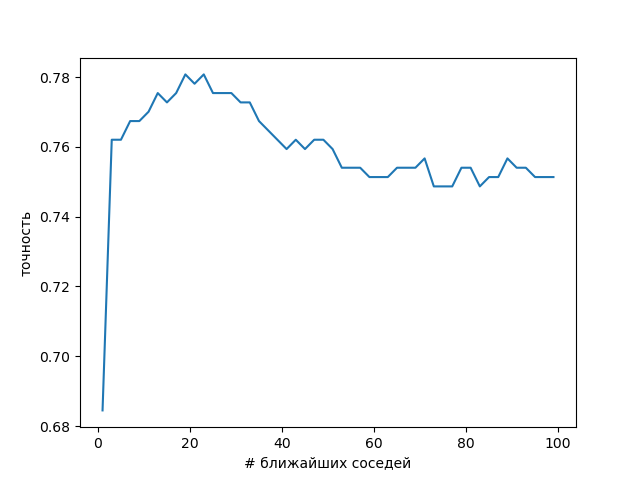

In [64]:
find_best_K_weighted(model, X_train3, Y_train, X_test3, Y_test)

### Попробуем изменять p в Lp метрнике расстояния.

In [65]:
def find_best_p(model, X_train, Y_train, X_test, Y_test):
    p_values = linspace(1,10,50)
    acc_values = []

    for p_value in p_values:
        # можно задать свою метрику близости (например Lp)
        model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, p=p_value)  
        model.fit(X_train,Y_train)
        Y_hat = model.predict(X_test)
        acc = sklearn.metrics.accuracy_score(Y_test, Y_hat)
        acc_values.append(acc)

    acc_values = np.array(acc_values)
    figure()
    plot(p_values, acc_values)
    xlabel('значение p в Lp метрике расстояния');
    ylabel('точность');
    
    print(f'Максимальная точность равна {max(acc_values):.2f}.')
    
    inds = np.where(acc_values==max(acc_values))[0]   # найдём индексы в массиве, дающие максимальную точность
    print(f'Максимальная точность достигается при p={p_values[inds[0]]:.2f}.')

Максимальная точность равна 0.80.
Максимальная точность достигается при p=2.29.


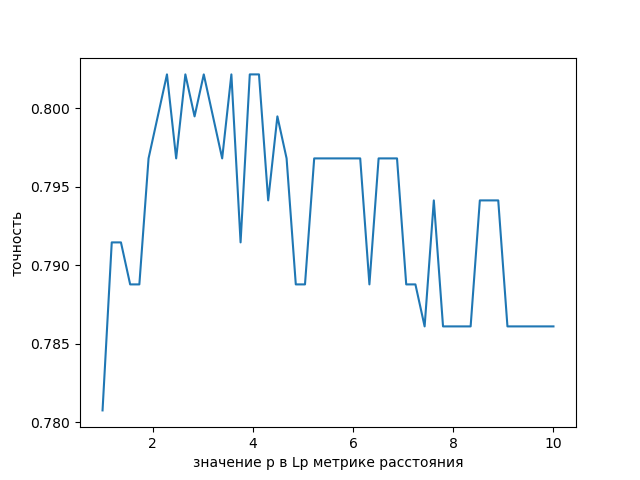

In [66]:
find_best_p(model, X_train3, Y_train, X_test3, Y_test)